# Ford Gobike Explanatory data analysis from year 2017-2019

## Introduction
This data set contains the trip data of Gobike from year 2017 till 2019. The data set contains attributes such as start station, end station, trip duration, user type, gender, etc. We have the data for the past 2 years for this product to analyse its performance and what steps can be taken to improve it by understanding the demographics of the user base.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
sb.set(color_codes=True)
%matplotlib inline

In [2]:
#reading the data from master csv file
df = pd.read_csv('gobike_master_data.csv')

/Users/Gagan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_clean=df.copy()

- Converting required data fields to Category type for easier analysis

In [4]:
df_clean['user_type'] = df_clean.user_type.astype('category')
df_clean['member_gender'] = df_clean.member_gender.astype('category')
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
day_order = [0,1,2,3,4,5,6]
df_clean['day_of_week'] = df_clean.day_of_week.astype('category', ordered=True, categories = day_order)

/Users/Gagan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


### User Gender Distribution 

- In order to understand the users of the gobike and to get a better idea of the demographics we need to see how the data is distributed. For doing that first we will see how different gender groups have taken trips using the Gobike over the years  

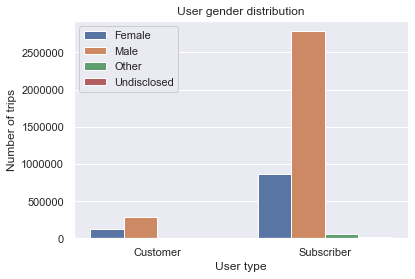

In [13]:
ax = sb.countplot(data = df_clean, x = 'user_type', hue = 'member_gender');
ax.legend(loc = 2, framealpha = 1); # upper left, no transparency
plt.xlabel('User type');
plt.ylabel('Number of trips');
plt.title('User gender distribution');

1. We find here that subscribers have booked a far more number of trip on the Gobike than the regular customers. In these numbers we also see that the Males have booked the most number of trips, when compared with the other genders.
2. In case of the customers we see that the females are almost half of what the males are, whereas in the case of subscribers the males have taken more than twice trips of what the females have taken.

In [6]:
#boxplot between user_type and duration_sec with duration sec less than 4000
# this is dont to remove some of the outliers to better understand the general distribution of the data 
bike_div = df_clean.query('duration_sec < 4000')

### Trip Duration Paradox

- Since we know that the trip duration for the customers is more than that of the subscribers and we also know that the the number of male users are much more than any of the other genders, is it safe to assume that the trip duration of the male members is also more than the other genders?

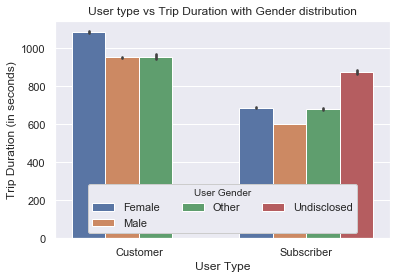

In [11]:
ax = sb.barplot(data = bike_div, x = 'user_type', y = 'duration_sec', hue='member_gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Gender')
plt.xlabel('User Type');
plt.ylabel("Trip Duration (in seconds)");
plt.title('User type vs Trip Duration with Gender distribution');

- In the above graph we see that even though the number of trips by males is more, the trip duration is lower than other gender groups. This was kind of a paradox and a misconeption many would have made if they do not see this visualisation. So despite the fact that more number of males are using the gobike, their mean trip duration is the lowest when you compare with the trip duration of other genders. This means that if a drive to focus to get other gender groups is initiated it would result in more revenue generation and also diversifies the product a bit more.

### Trips comparison between days of the week
- One importnt thing to note is the trend of the trips being booked over the week. For this I will be plotting a graph of the trips over the different days of the week to understand this trend. I will use a facet grid plot to see this trend. Since the two main gender groups in this case are male and female, I will be using only these two gender groups for this analysis.

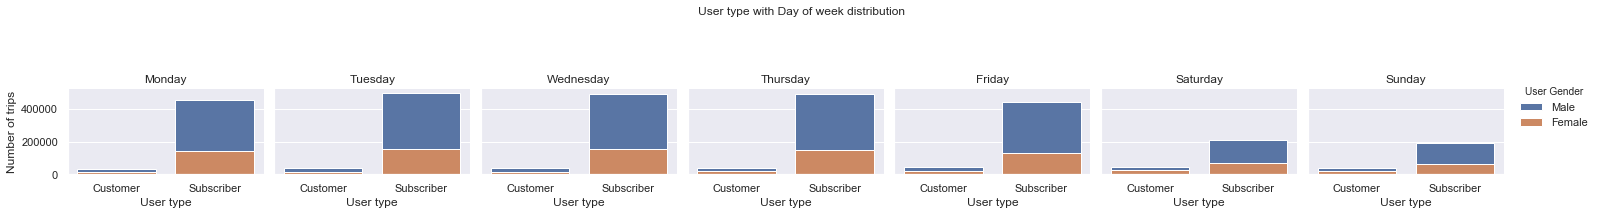

In [17]:
df_div = df_clean.query('member_gender == "Male" or member_gender == "Female"')
g = sb.FacetGrid(data = df_div, col = 'day_of_week', hue = 'member_gender', hue_order = ['Male','Female'], size=3);
g.map(sb.countplot, 'user_type').add_legend(title = 'User Gender');
g.set_titles('{col_name}');
g.set_axis_labels('User type','Number of trips');
plt.subplots_adjust(top=0.6)
g.fig.suptitle('User type with Day of week distribution')
ax = g.axes.flatten();
ax[0].set_title('Monday');
ax[1].set_title('Tuesday');
ax[2].set_title('Wednesday');
ax[3].set_title('Thursday');
ax[4].set_title('Friday');
ax[5].set_title('Saturday');
ax[6].set_title('Sunday');

1. Above we can clearly see that the trips during the week days with a positive trend till Thursday and then shows a negative trend thursday onwards till sunday. So to increase the trips during the weekends there should be more offers and discounts to make the trend positive. We can also assume that people prefer to go to work using Gobike.
2. We can also see that the customer trip bookings are fairly constant over the entire week.

### Trip duration trend over time 
What is the trip duration trend over time? Is the trip duration over time increasing or decreasing? We need to understand this aspect of the data as well to get an idea how well the user are engaged with Gobike. If there is a decreasing trip duration it may also eventually mean that people are losing interest or less revenue generated from the product.

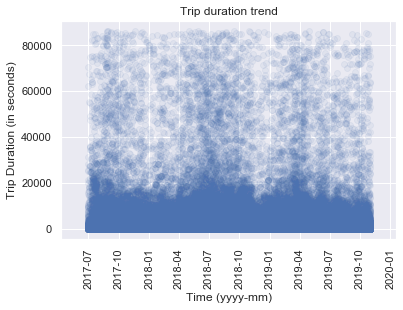

In [18]:
#taking the data where the gender is either male or female
df_mf = df_clean.query('member_gender == "Female" or member_gender == "Male"')
plt.scatter(data=df_mf, x= 'start_time', y = 'duration_sec', alpha = 1/15);
plt.xticks(rotation = 90);
plt.xlabel('Time (yyyy-mm)');
plt.ylabel('Trip Duration (in seconds)');
plt.title('Trip duration trend');

- This is a scatter plot to understand the trend between the trip duration with time. I have added transperancy to avoid overplotting of data so that the trend can be seen clearly with less confusion. We see here that there is a negative trend. The Trip duration has been dropping and we need to figure out the root cause for the same.

## Conclusion
- The following are my conclusions/inferences which can be used to increase the performace of the Gobike application:
>1. Even though we see that the male users are more, there should be a focus to engage other gender groups as well 
>2. As we can see in the second point that the average trip duration of the other groups is far more than the male average trip duration, by increasing other gender enagegments more revenue can be generated
>3. More offers should be given during the weekends to increase the useage during the same
>4. Root cause analysis should be done to understand why the trip duration over time is decreasing

# Thank you 